# Importing all important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting up some options in pandas as my requirment

In [2]:
df=pd.read_csv('data/train.csv')
pd.set_option('display.max_columns',None)

# Here checking the data type of each feature for further proceed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Here find the % of nan feature present in each feature

In [4]:
nan_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
len(nan_feature)
for feature in nan_feature:
    print(feature,np.round(df[feature].isnull().mean(),4),"% of nan value")

LotFrontage 0.1774 % of nan value
Alley 0.9377 % of nan value
MasVnrType 0.0055 % of nan value
MasVnrArea 0.0055 % of nan value
BsmtQual 0.0253 % of nan value
BsmtCond 0.0253 % of nan value
BsmtExposure 0.026 % of nan value
BsmtFinType1 0.0253 % of nan value
BsmtFinType2 0.026 % of nan value
FireplaceQu 0.4726 % of nan value
GarageType 0.0555 % of nan value
GarageYrBlt 0.0555 % of nan value
GarageFinish 0.0555 % of nan value
GarageQual 0.0555 % of nan value
GarageCond 0.0555 % of nan value
PoolQC 0.9952 % of nan value
Fence 0.8075 % of nan value
MiscFeature 0.963 % of nan value


# Here we observing impact of nan value in dependent variable

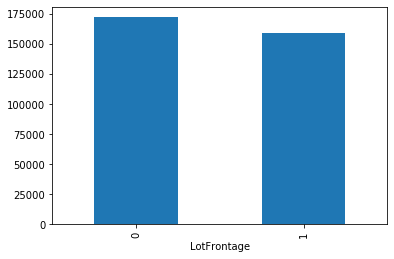

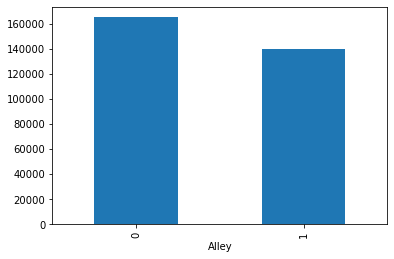

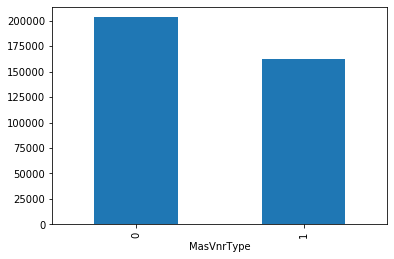

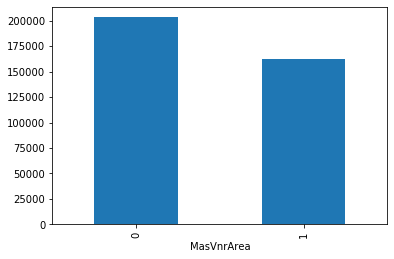

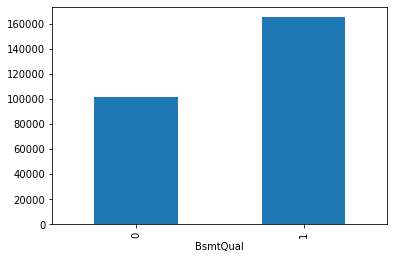

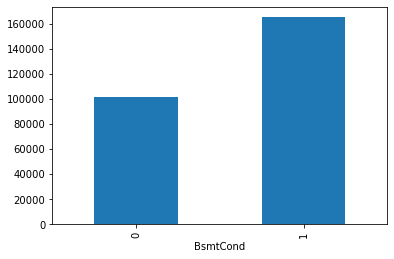

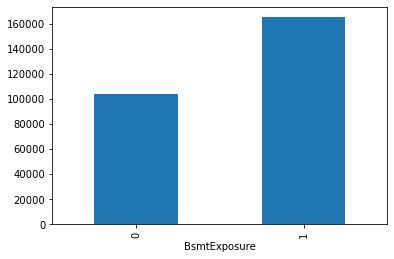

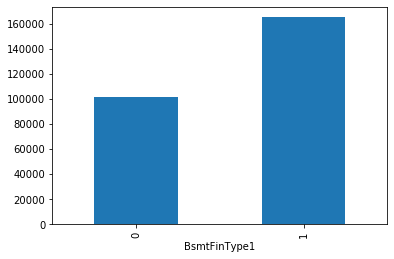

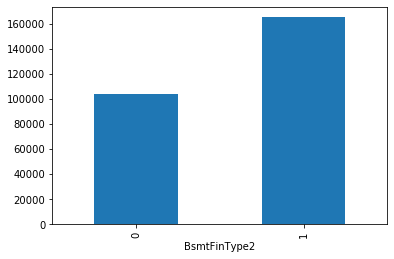

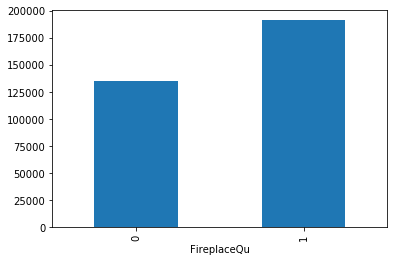

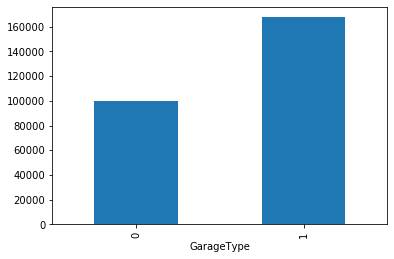

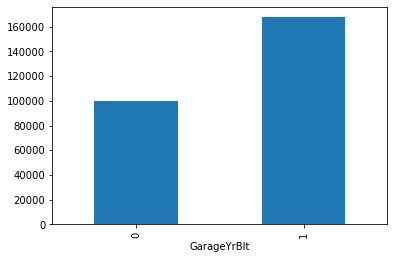

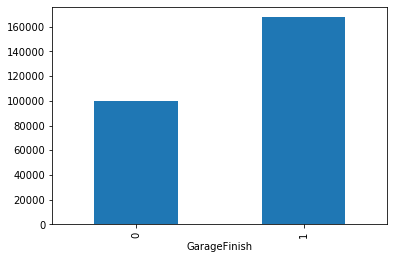

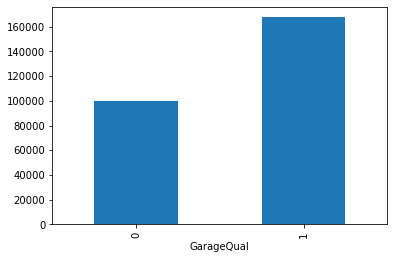

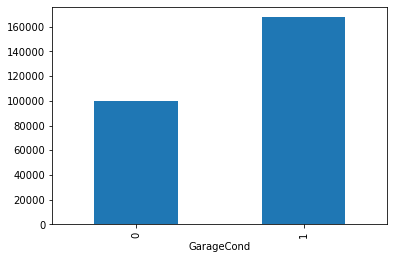

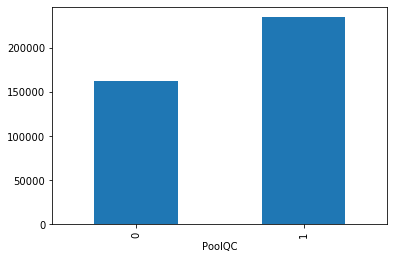

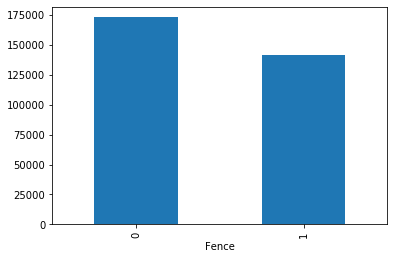

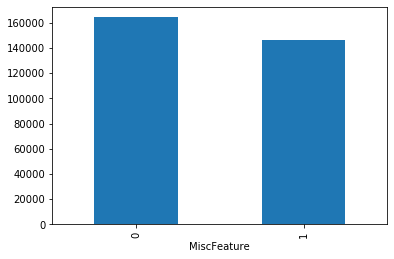

In [5]:
for feature in nan_feature:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

# Here I segragate catagorical feature into that dataset for further analysis

In [6]:
catagorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
for feature in catagorical_feature:
    print(feature,len(df[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


# Here I segragate disccrete feature into that dataset for further analysis

In [7]:
discrete_feature=[feature for feature in df.columns if df[feature].dtype!='O' and len(df[feature].unique())<30
                  and 'Yr' not in feature]
for feature in discrete_feature:
    print(feature,len(df[feature].unique()))

MSSubClass 15
OverallQual 10
OverallCond 9
LowQualFinSF 24
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
3SsnPorch 20
PoolArea 8
MiscVal 21
MoSold 12


# Here I segragate continious feature into that dataset for further analysis

In [8]:
continious_feature=[feature for feature in df.columns if df[feature].dtype!='O' and 
                    feature not in discrete_feature and 'Yr' not in feature and 'Year' not in feature
                    and 'Id' not in feature and 'SalePrice' not in feature]
# for feature in continious_feature:
#     if df[feature].isnull().sum()>1:
#         print(feature)
#     else:
#         pass
continious_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

# Here segragate temporal feature into that dataset for further analysis

In [9]:
temporal_feature=[feature for feature in df.columns if 'Year' in feature or 'Yr' in feature ]
temporal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# Here checked the the relation between dependent feature wrt catagorical feature

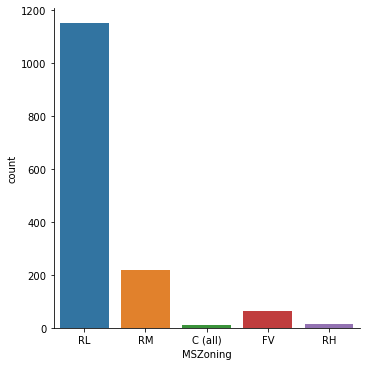

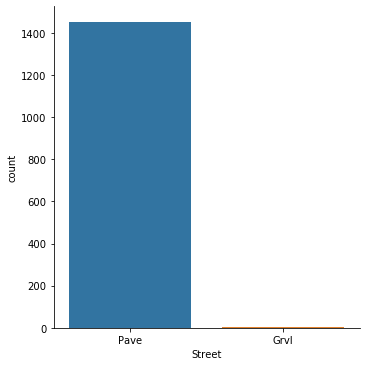

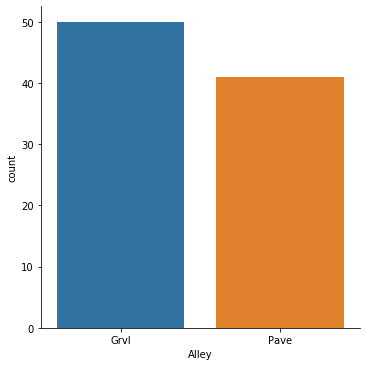

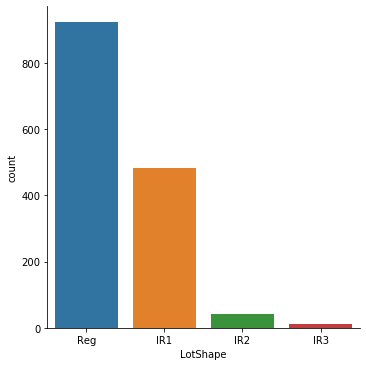

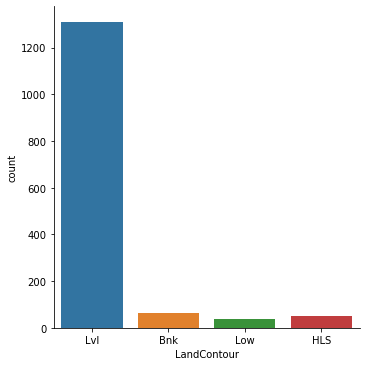

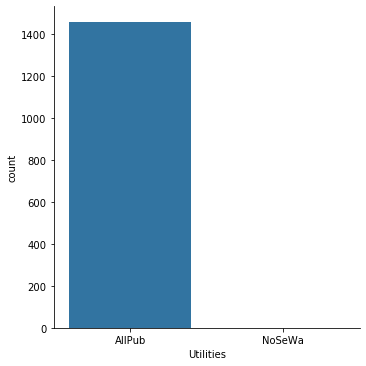

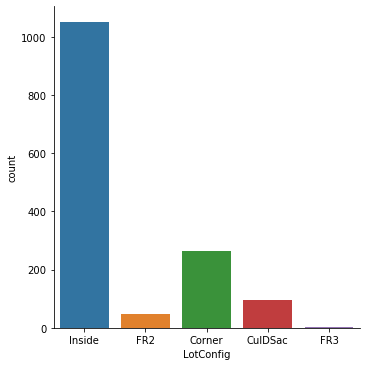

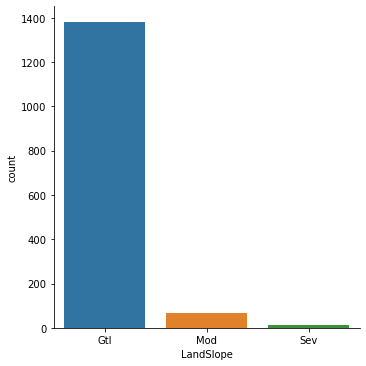

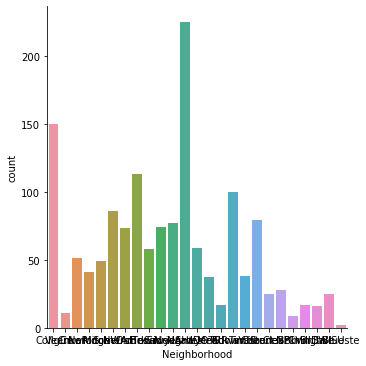

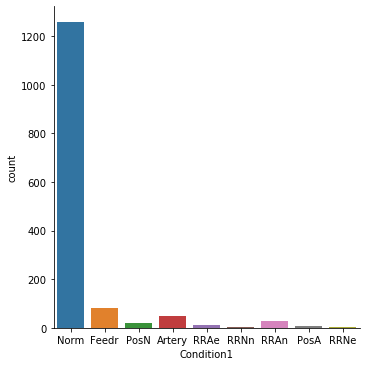

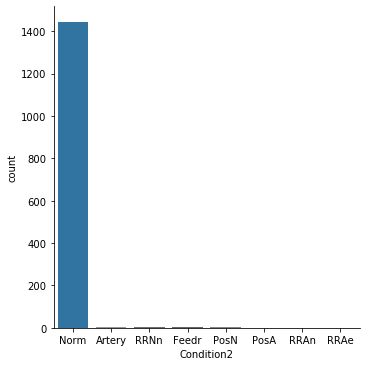

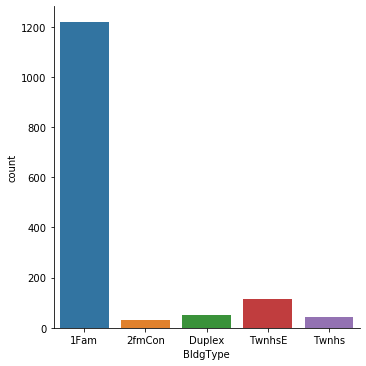

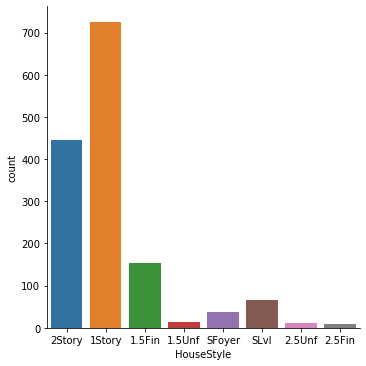

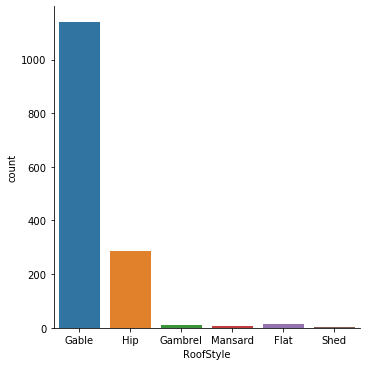

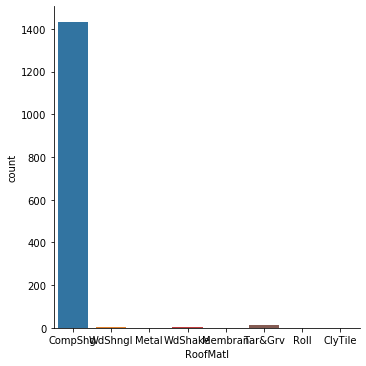

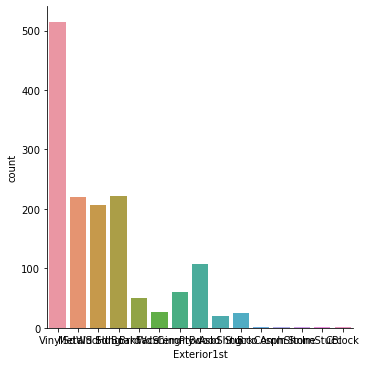

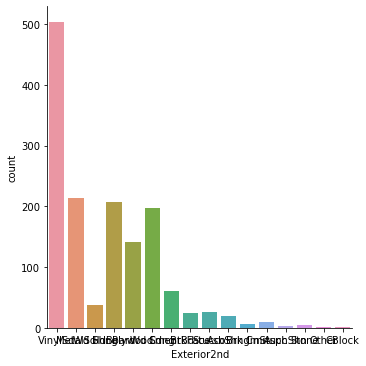

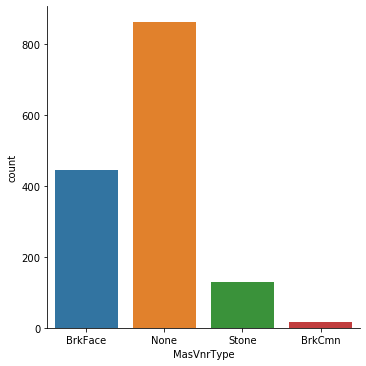

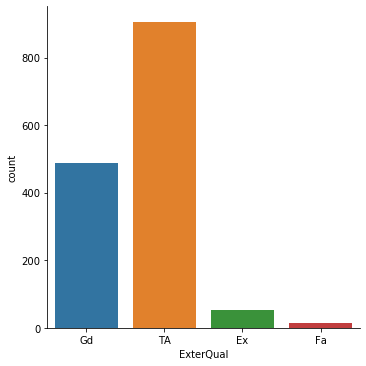

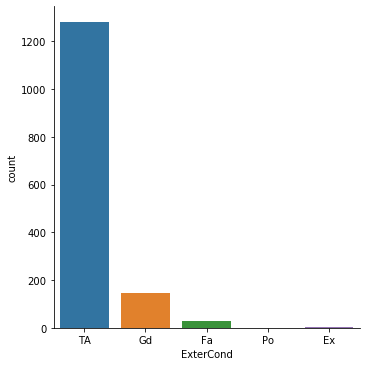

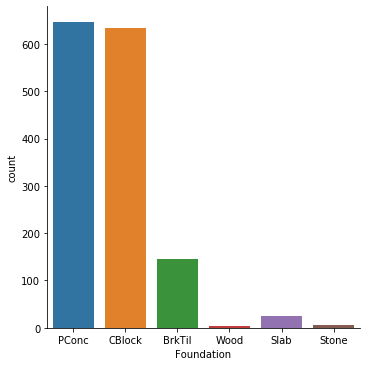

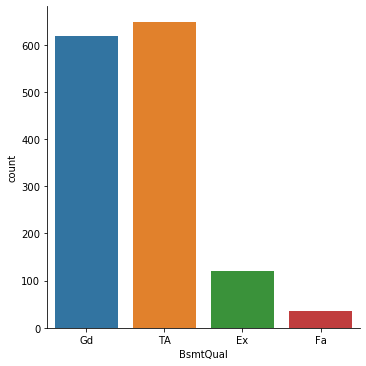

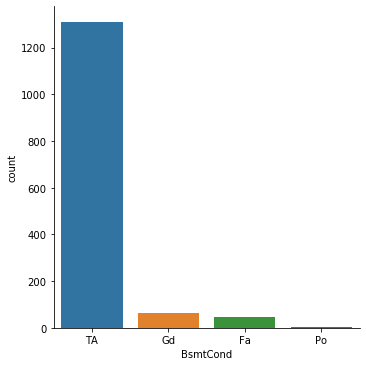

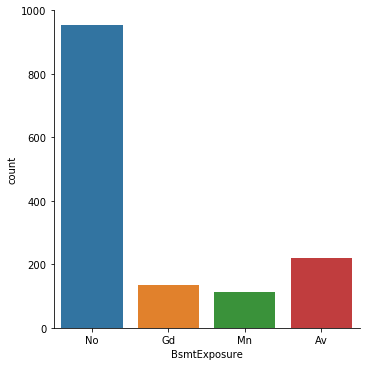

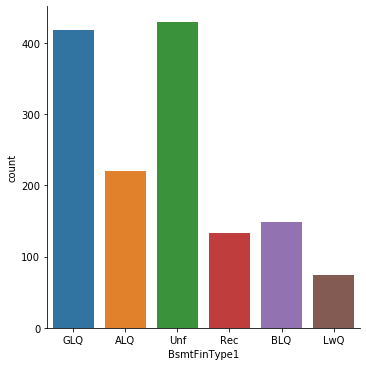

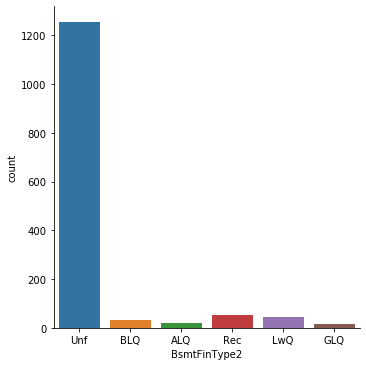

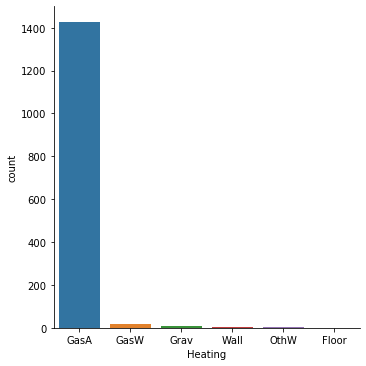

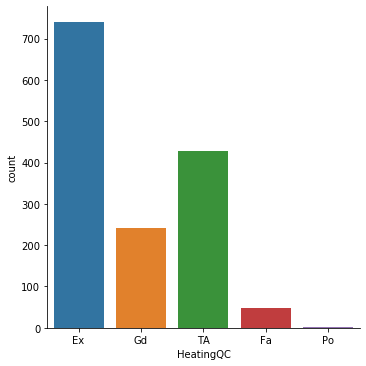

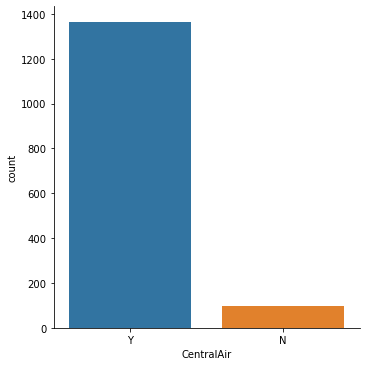

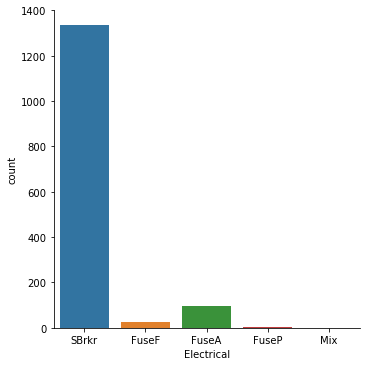

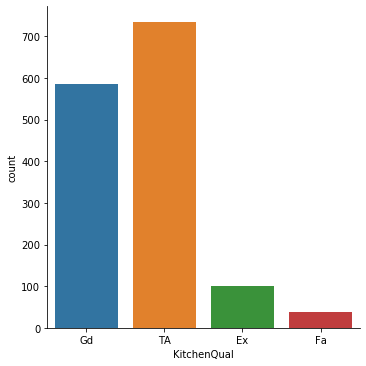

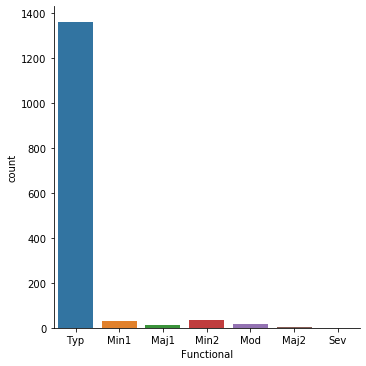

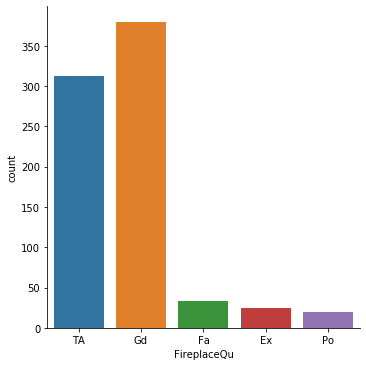

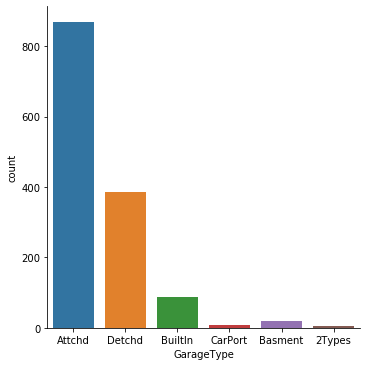

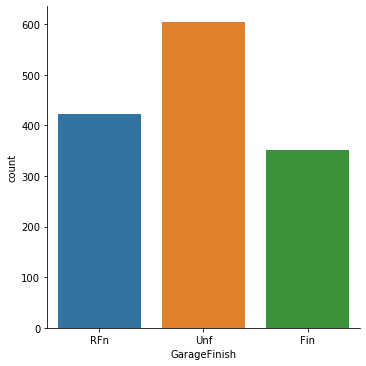

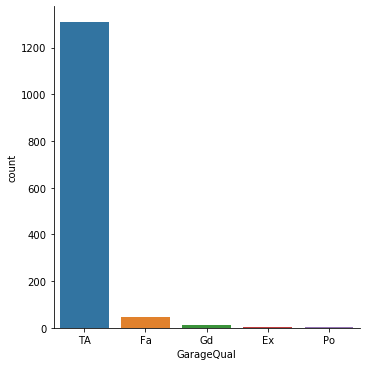

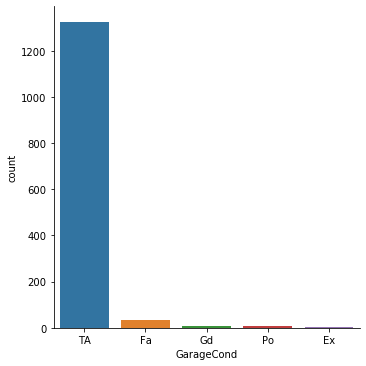

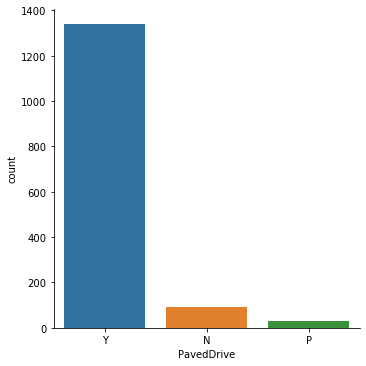

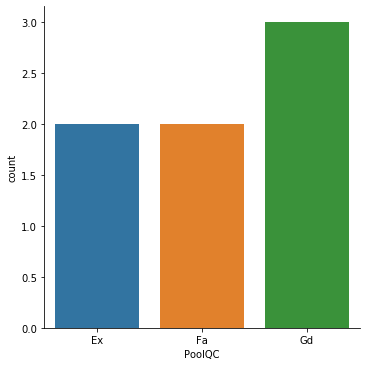

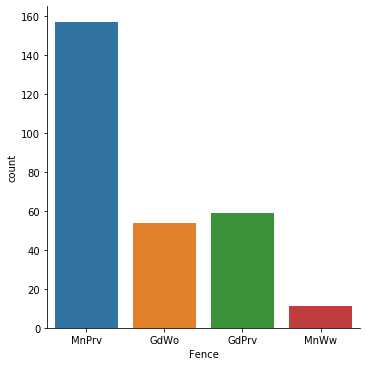

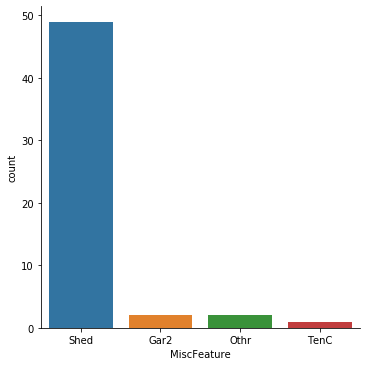

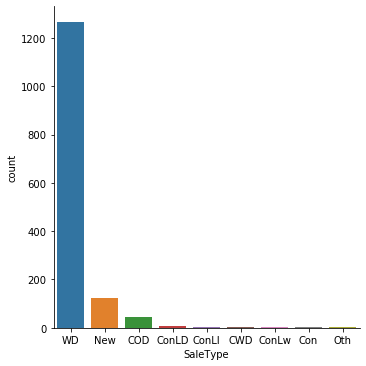

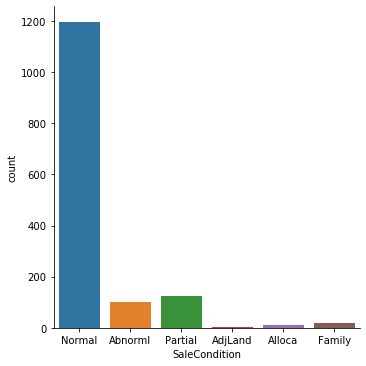

In [10]:
for feature in catagorical_feature:
    data=df.copy()
    sns.catplot(data=data,x=feature,kind='count')
    plt.show()
    

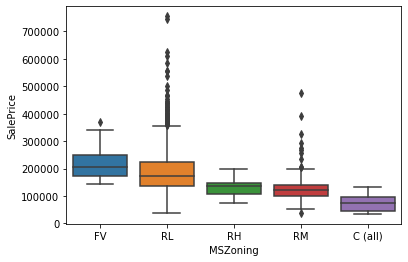

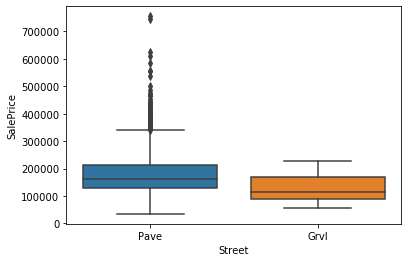

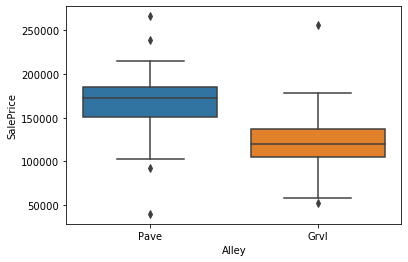

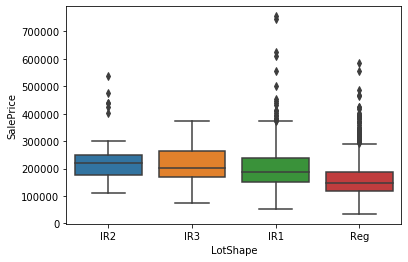

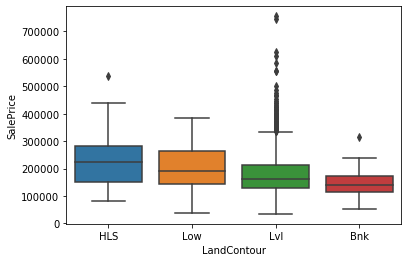

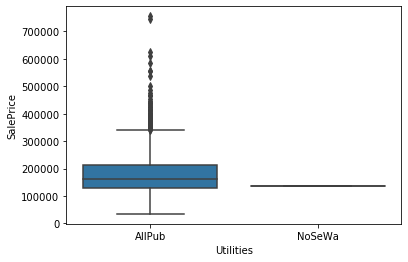

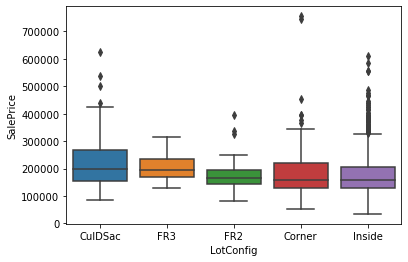

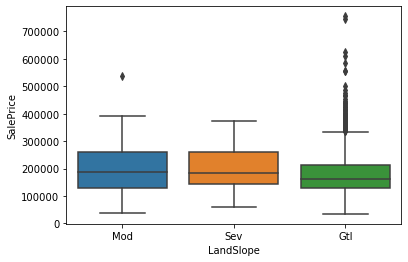

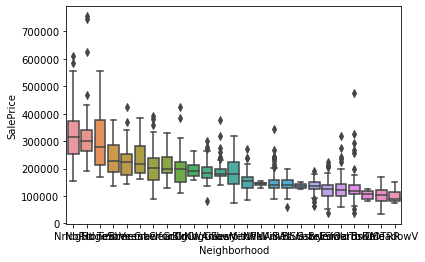

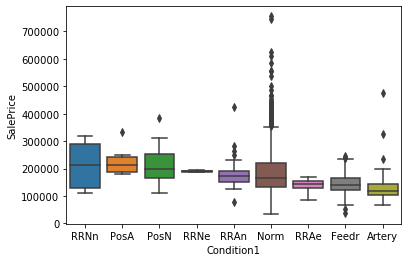

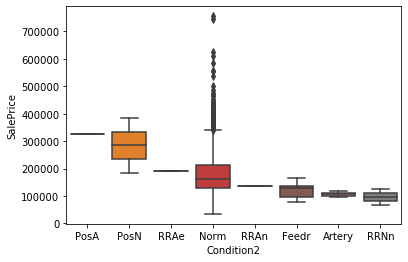

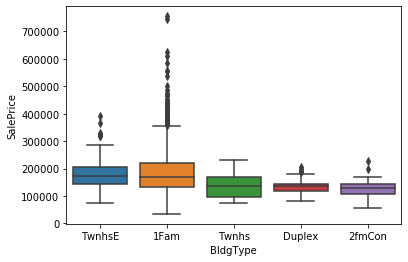

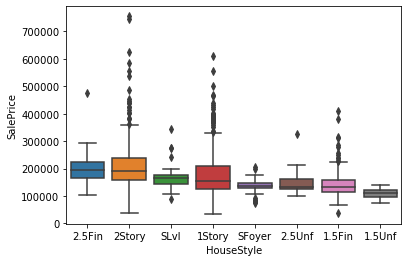

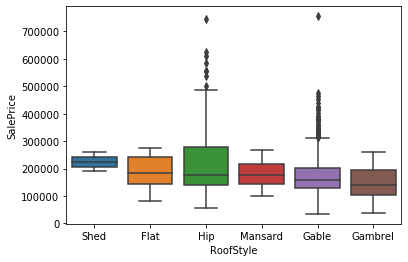

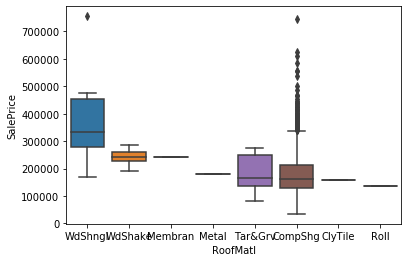

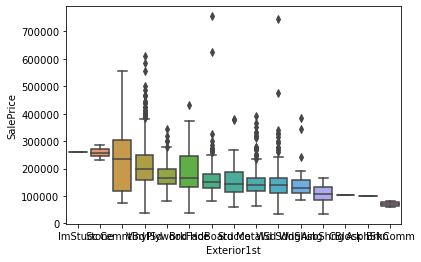

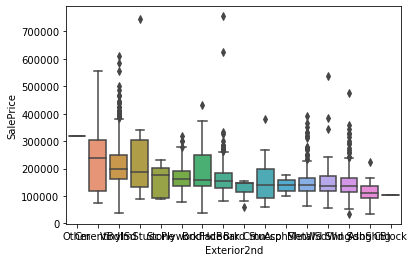

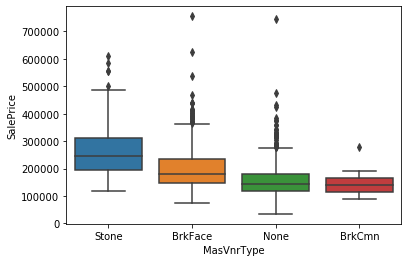

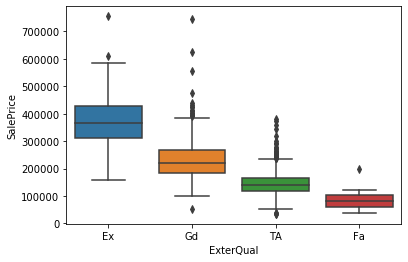

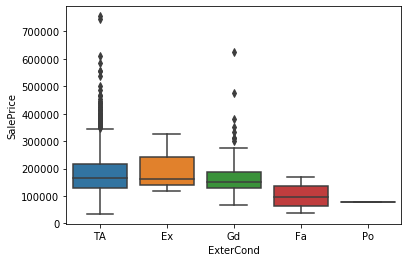

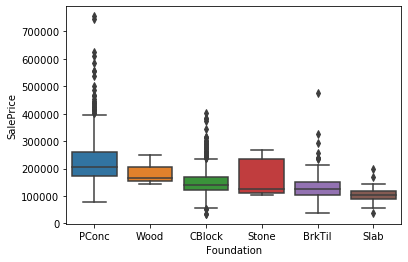

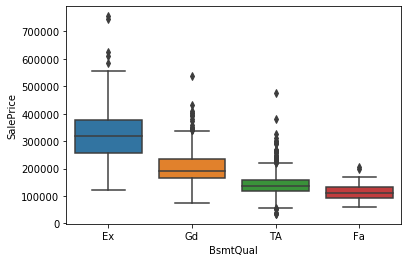

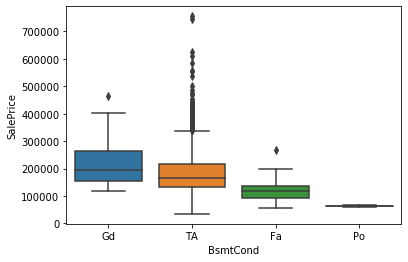

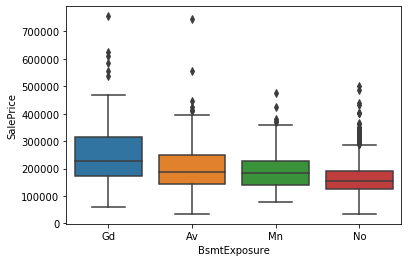

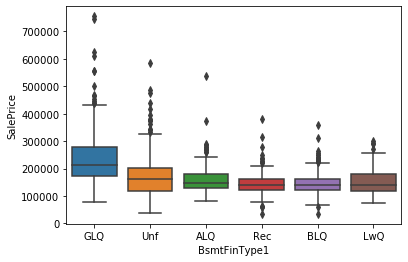

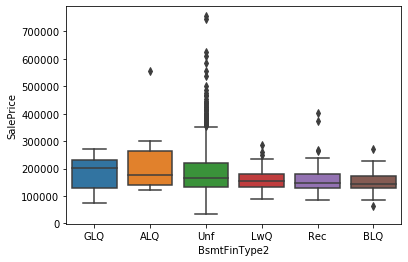

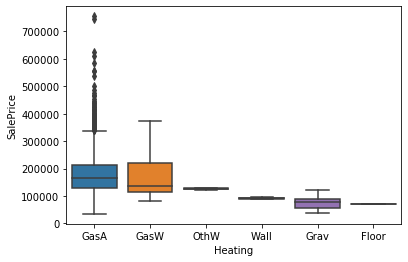

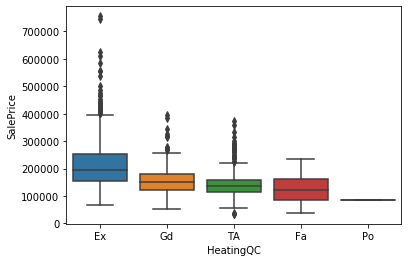

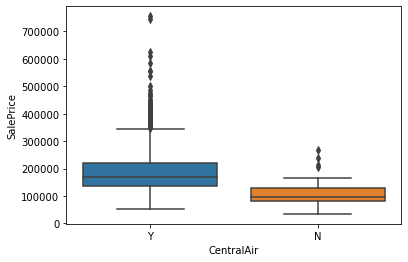

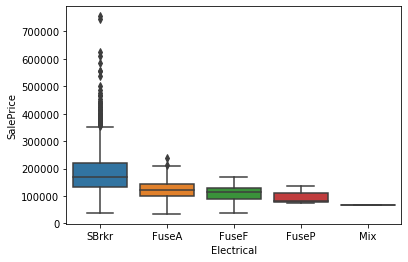

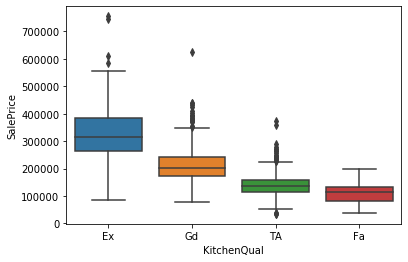

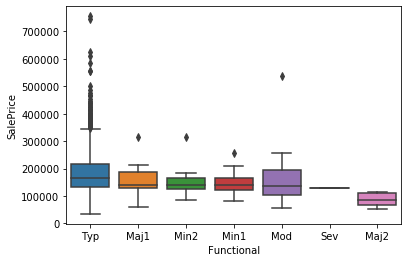

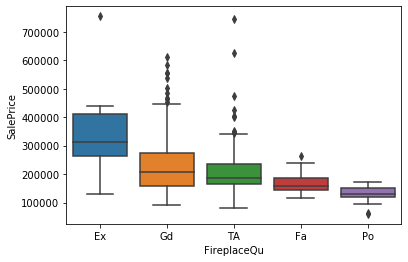

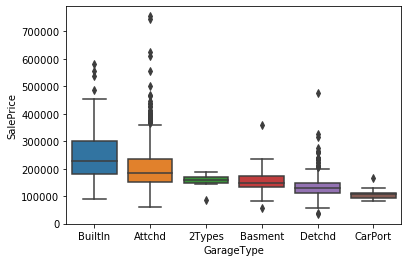

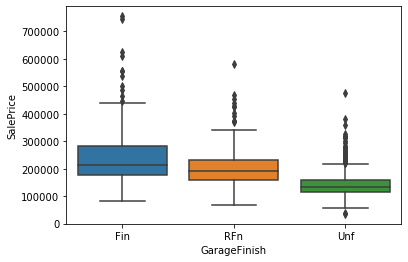

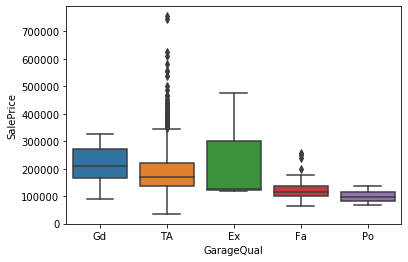

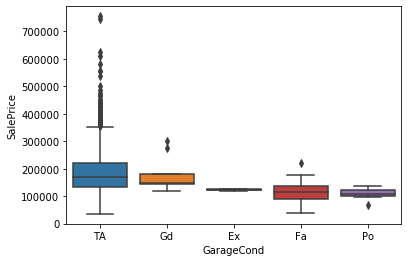

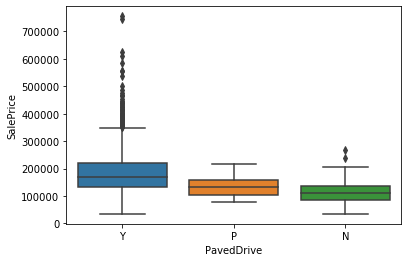

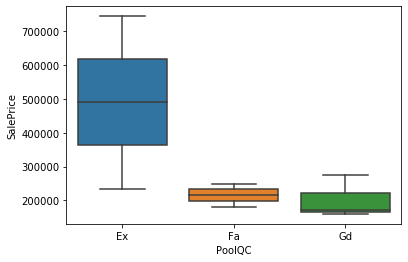

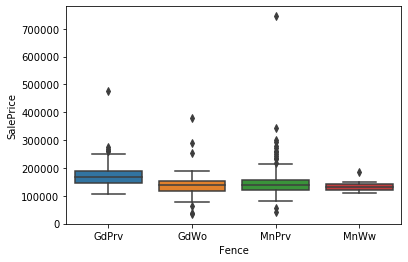

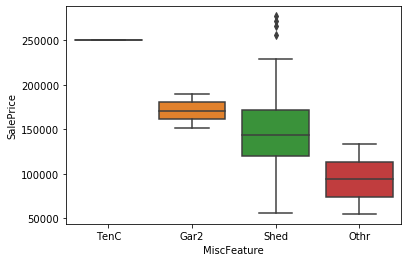

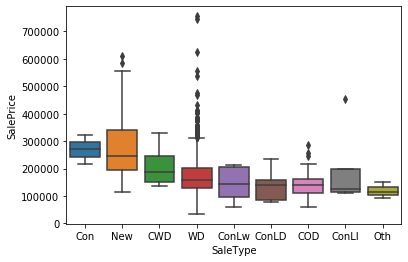

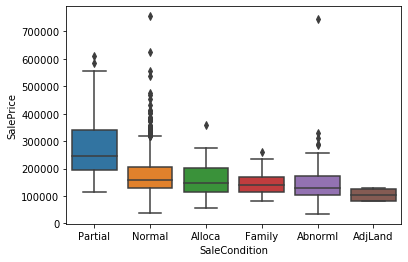

In [11]:
for feature in catagorical_feature:
    data=df.copy()
    gr=data.groupby([feature])['SalePrice'].median().sort_values(ascending=False)
    list1=[item for item in gr.index]
    sns.boxplot(data=data,x=feature,y='SalePrice',order=list1)
    plt.show()

In [12]:
sort_list = sorted(df.groupby('MiscFeature')['SalePrice'].median().items(), key= lambda x:x[1], reverse = True)
sort_list
order_list = [x[0] for x in sort_list ]
order_list

['TenC', 'Gar2', 'Shed', 'Othr']

In [13]:
gr=df.groupby(['MSZoning'])['SalePrice'].median().sort_values(ascending=False)
gr.index
list1=[item for item in gr.index]
list1

['FV', 'RL', 'RH', 'RM', 'C (all)']

# Here checked the the relation between dependent feature wrt discrete feature

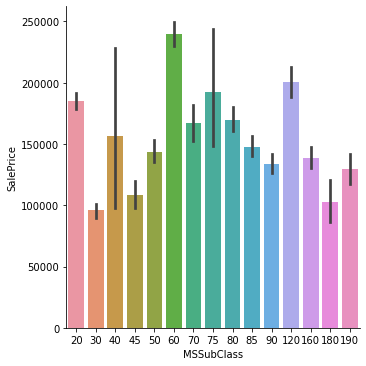

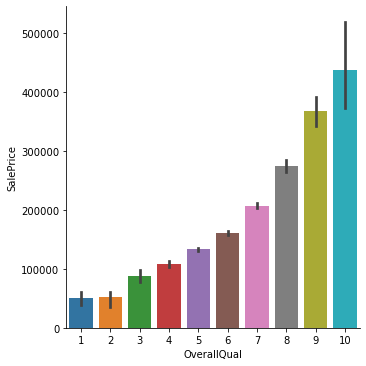

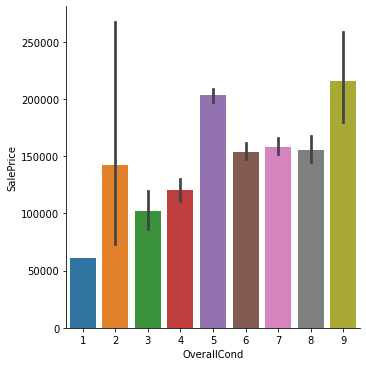

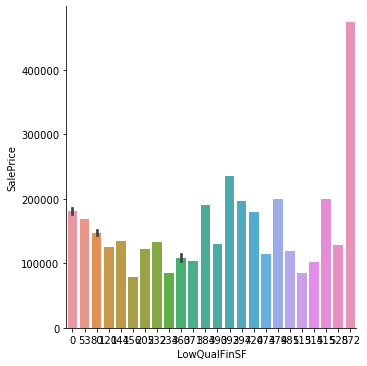

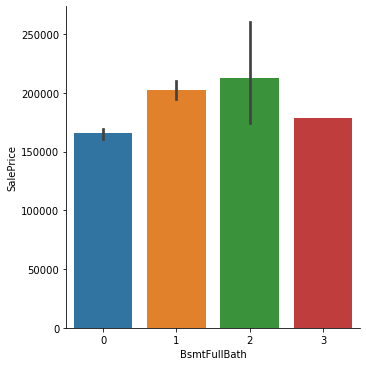

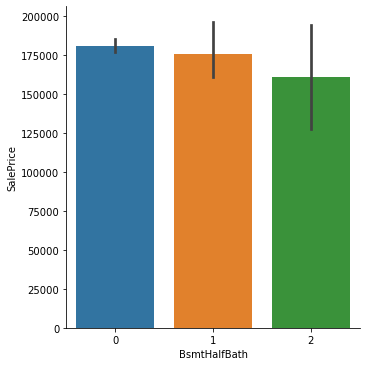

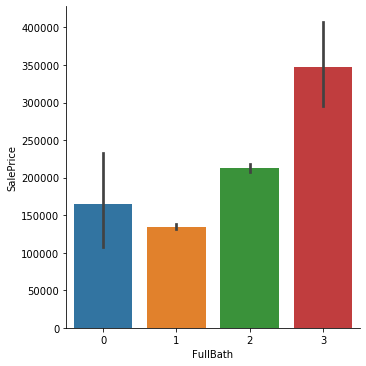

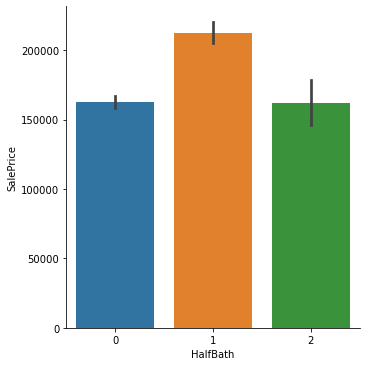

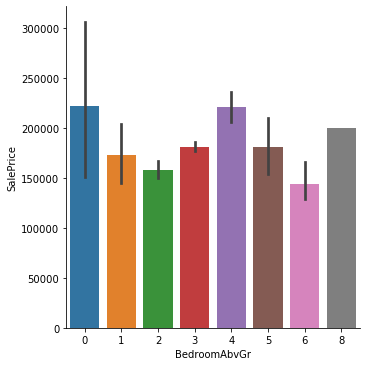

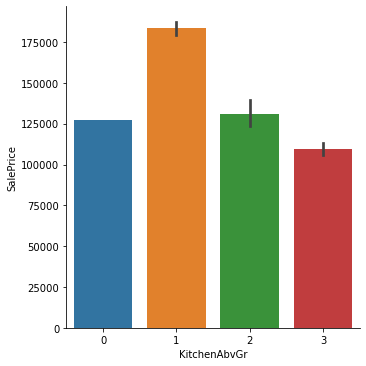

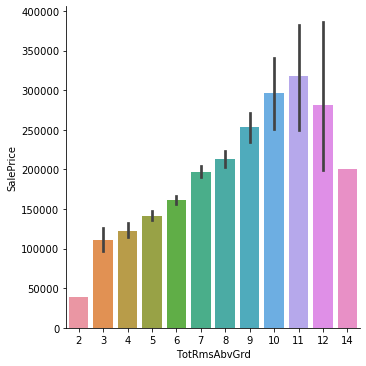

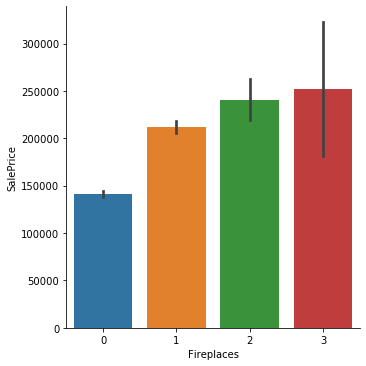

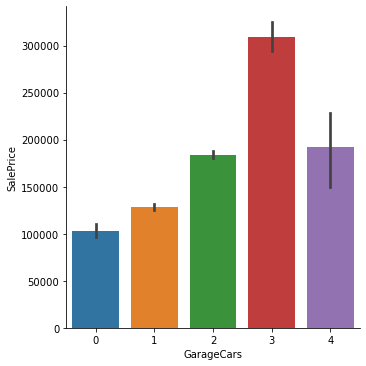

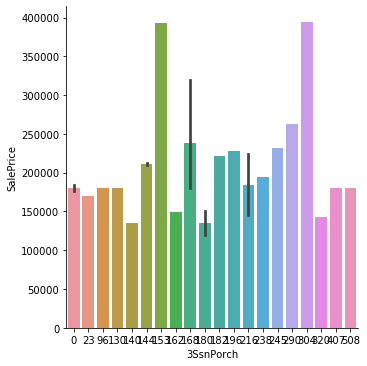

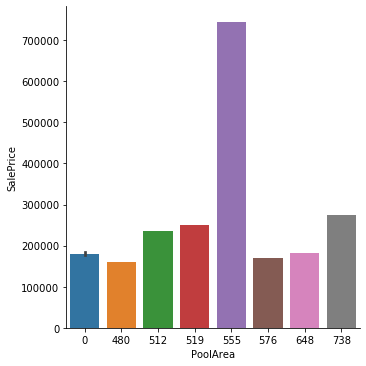

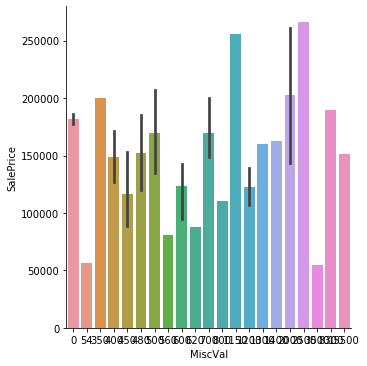

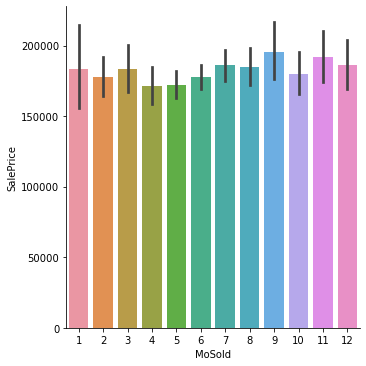

In [14]:
for feature in discrete_feature:
    data=df.copy()
    sns.catplot(data=data,x=feature,kind='bar',y='SalePrice')
    plt.show()

# Here checked the the relation between dependent feature wrt continious feature

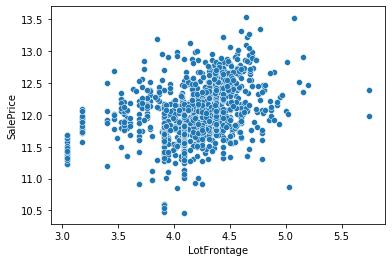

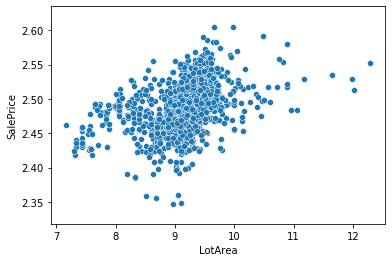

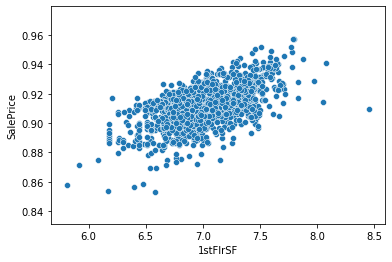

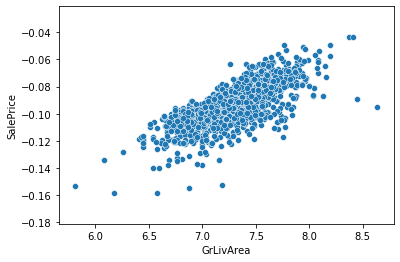

In [15]:
list1=[]
for feature in continious_feature:
    if 0 in data[feature].unique():
        pass
    else:   
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        sns.scatterplot(data=data,x=feature,y='SalePrice')
        list1.append(feature)
        plt.show()

In [16]:
list1

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

# Outlier detection of continious feature

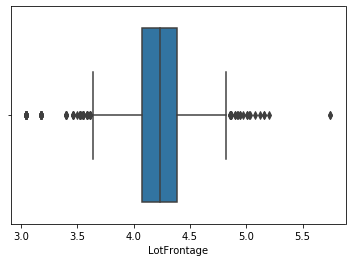

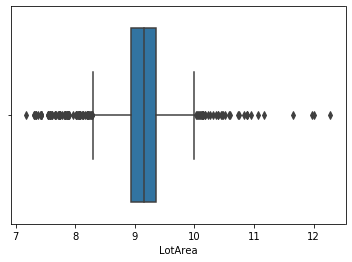

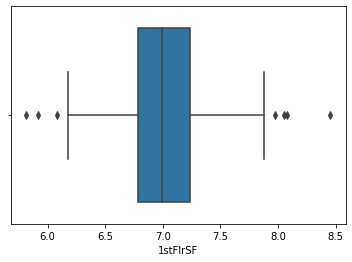

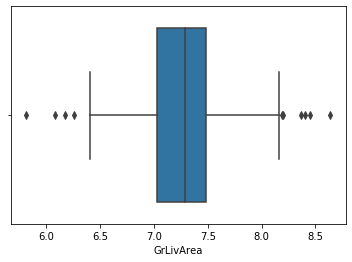

In [17]:
for feature in continious_feature:
    if 0 in df[feature].unique():
        pass
    else:
        data=df.copy()
        data[feature]=np.log(data[feature])
        sns.boxplot(data=data,x=feature)
        plt.show()
    

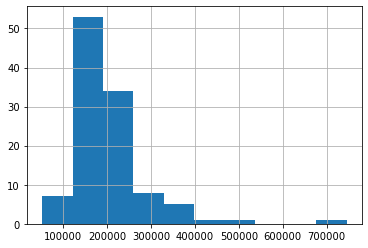

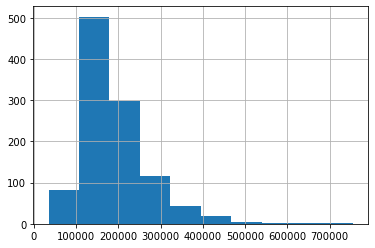

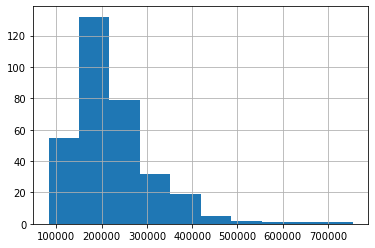

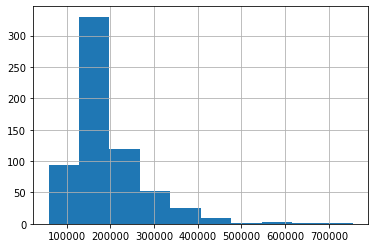

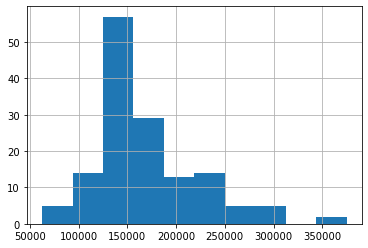

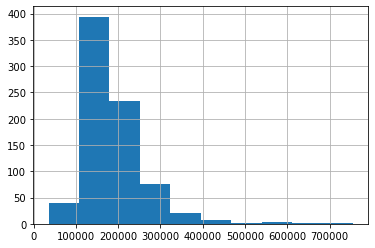

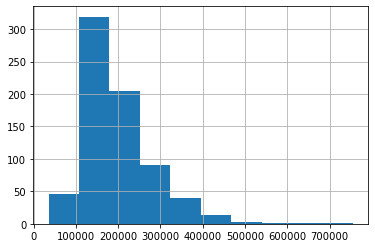

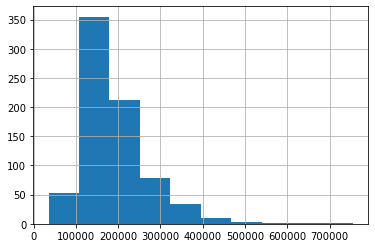

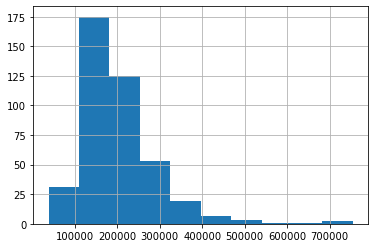

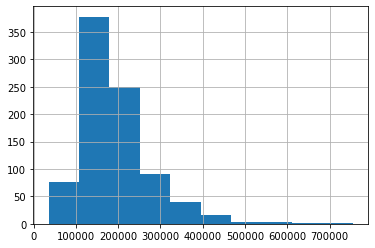

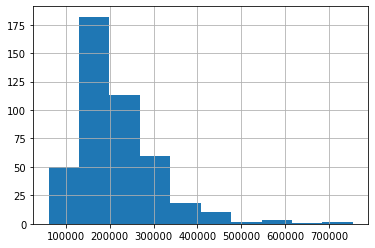

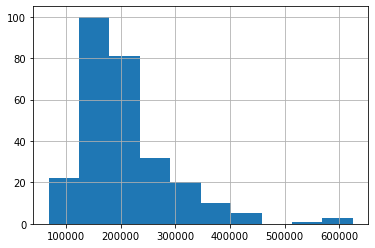

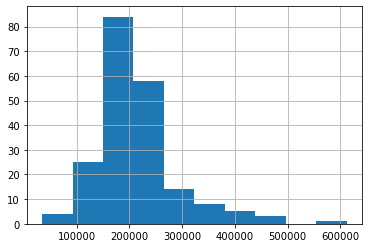

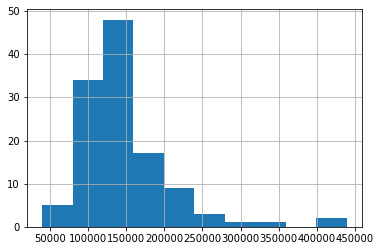

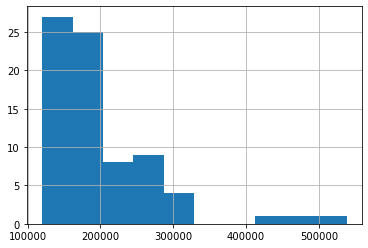

In [18]:
for feature in continious_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().hist()
    plt.show()

# Here checked the unique value present in temporal feature

In [19]:
for feature in temporal_feature:
    print(feature,df[feature].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

# Here did some feature engineering of temporal feature 

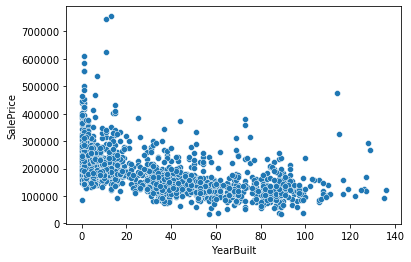

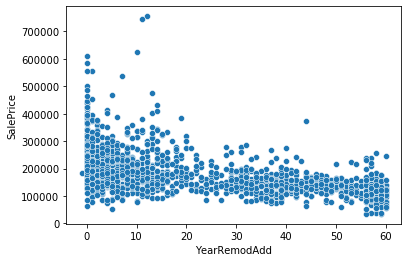

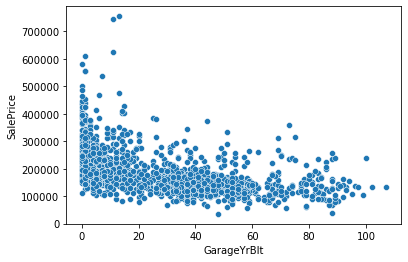

In [20]:
for feature in temporal_feature:
    data=df.copy()
    if feature=='YrSold':
        pass
    else:
        data[feature]=data['YrSold']-data[feature]
        sns.scatterplot(data=data,x=feature,y='SalePrice')
        plt.show()

# Here same did some feature engineering of temporal feature

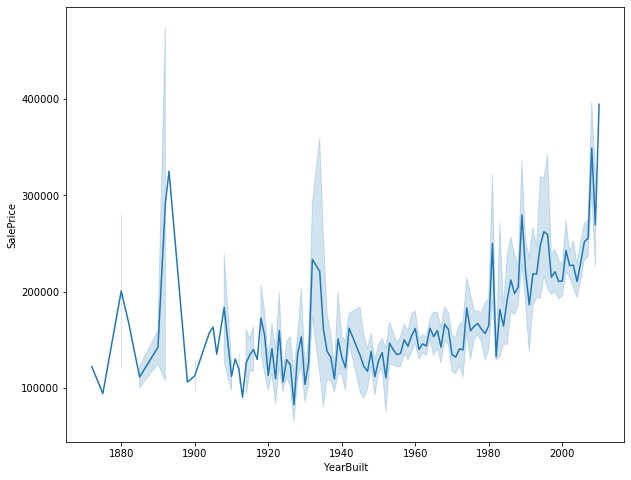

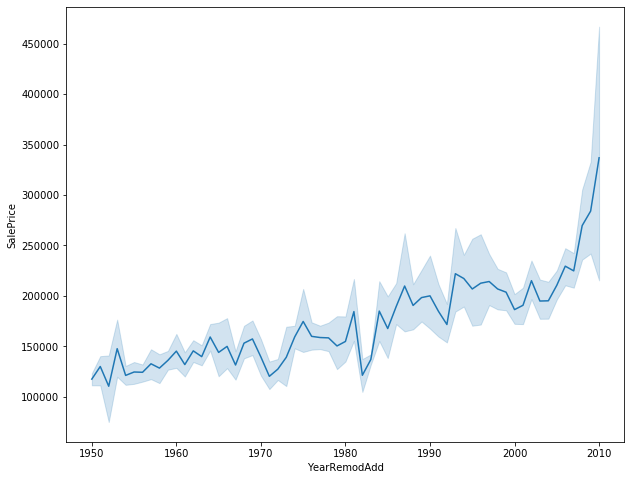

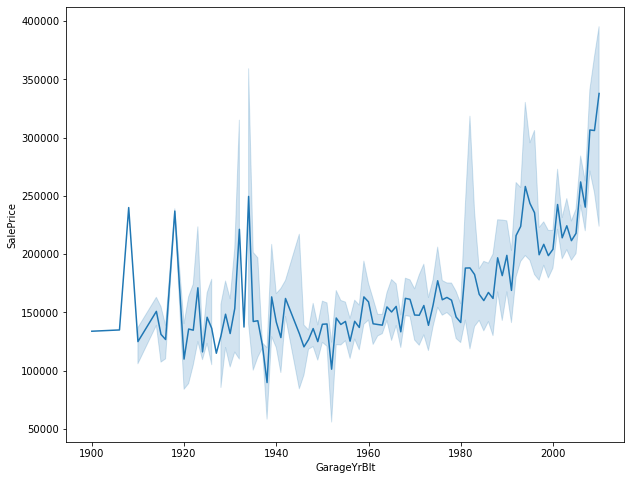

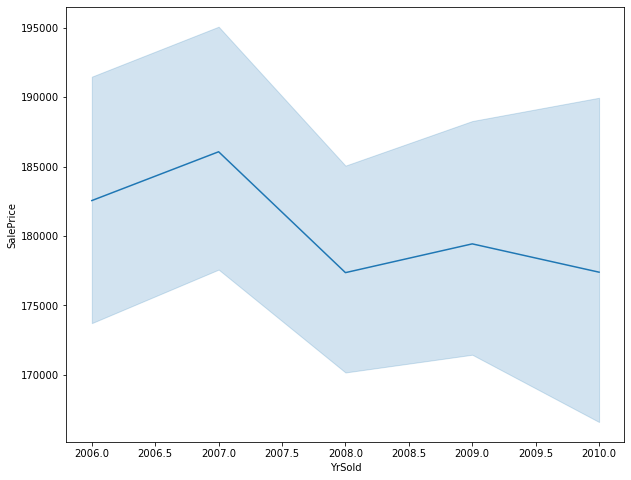

In [21]:
for feature in temporal_feature:
    data=df.copy()
    plt.figure(figsize=(10,8))
    sns.lineplot(data=data,x=feature,y='SalePrice')
    plt.show()